In [1]:
from __future__ import division
from torchvision import models
from torchvision import transforms
from PIL import Image
import argparse
import torch
import torchvision
import torch.nn as nn
import numpy as np

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else "cpu")

In [8]:
# 读取两张图片
def load_image(image_path, transform=None, max_size=None, shape=None):
    image = Image.open(image_path)
    if max_size:
        scale = max_size / max(image.size)
        size = np.array(image.size) * scale
        image = image.resize(size.astype(int),Image.ANTIALIAS)
    if shape:
        image = image.resize(shape,Image.LANCZOS)
        
    if transform:
        image = transform(image).unsqueeze(0)
    return image.to(device)
        
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485,0.456,0.406],std=[0.229,0.224,0.225])
])

content = load_image('1.jpg', transform, max_size=400)
style = load_image('2.jpeg', transform , shape=[content.size(2),content.size(3)])

In [10]:
content.shape

torch.Size([1, 3, 400, 400])

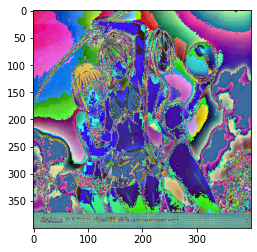

In [12]:
import matplotlib.pyplot as plt

unloader = transforms.ToPILImage() #reconvert into PIL image
plt.ion()

def imshow(tensor, title=None):
    image = tensor.cpu().clone() 
    image = image.squeeze(0)  # remove batch dimension
    image = unloader(image)
    plt.imshow(image)
    if title is not None:
        plt.title(title)
    plt.pause(0.001) # pause a bit so that plots are updated 稍作停顿，以便更新绘图
    
    
plt.figure()
imshow(style[0])

In [14]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [17]:
class VGGNet(nn.Module):
    def __init__(self):
        super(VGGNet,self).__init__()
        self.select = ['0','5','10','19','28']
        self.vgg = models.vgg19(pretrained=True).features
        
    def forward(self,x):
        features = []
        for name,layer in self.vgg._modules.items():
            x = layer(x)
            if name in self.select:
                features.append(x)
                
        return features

In [19]:
# models.vgg19().features
vgg = VGGNet().to(device).eval()

features = vgg(content)

for feat in features:
    print(feat.shape)

UnpicklingError: invalid load key, '<'.